# Project Topic :  
## Track, Analyse and Predict the Productivity and  Performance of the working teams in the Garment Industry
<img src='garments.png' width=500 height=500>
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#da"> Data Assessment</a></li>
<li><a href="#dr">Data Wrangling</a></li>
<li><a href="#eda">Exploratory data analysis</a></li>
<li><a href="#fe">Feature Engineering</a></li>
<li><a href="#df">data preprocessing and feature selection</a></li>
 <li><a href="#ms">Model selection,development and evaluation</a></li>
<li><a href="#hp">Hyper parameter optimization</a></li>
 <li><a href="#co">Conclusion</a></li>
<li><a href="#Re">Recommendations</a></li>
</ul>


## Introduction
The Garment Industry is an industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories. This project aims to predict the productivity range (0-1) using regressors or for classification purpose by transforming the productivity range (0-1) into different classes.

### Attribute Information
`01 date : Date in MM-DD-YYYY
02 day : Day of the Week
03 quarter : A portion of the month. A month was divided into four quarters
04 department : Associated department with the instance
05 team_no : Associated team number with the instance
06 no_of_workers : Number of workers in each team
07 no_of_style_change : Number of changes in the style of a particular product
08 targeted_productivity : Targeted productivity set by the Authority for each team for each day.
09 smv : Standard Minute Value, it is the allocated time for a task
10 wip : Work in progress. Includes the number of unfinished items for products
11 over_time : Represents the amount of overtime by each team in minutes
12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
13 idle_time : The amount of time when the production was interrupted due to several reasons
14 idle_men : The number of workers who were idle due to production interruption
15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import make_column_transformer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

<a id='da'></a>
## Data Assessment 

In [2]:
df = pd.read_csv('garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
df= df.drop(columns=['date'],axis=1)

In [4]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [5]:
df.shape

(1197, 14)

In [6]:
df.isnull().sum()

quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [9]:
#run the summary statistics
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


> From the summary statistics above: the following can be infered:
- about 25% of the employees had below a target productivity of 0.700000 and actual productivity of 0.650307, while about 50 % had below 0.75 target productivity and 0.7733 actual productivity
- most of the varibles are not normally scaled as their mean and variances are neither (0,1), hence there will be need to normalize the data subsequently before training estimators(models)
- variables like wip, incentive, idle_time might have outliers because the difference between the 75% values and maximum values in each column is too large, hence, this will be further explored and removed if needed with regards to research and statistical patterns in the course of this project.

<AxesSubplot:>

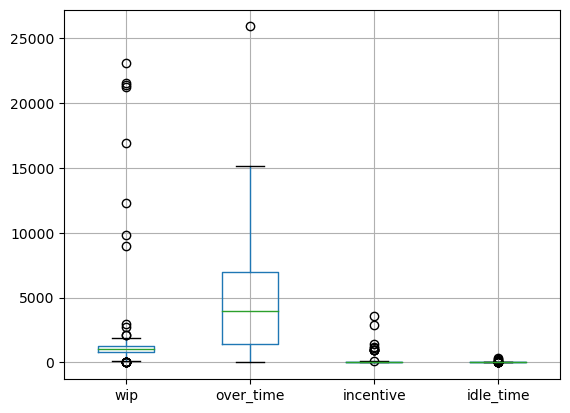

In [10]:
columns= ['wip','over_time','incentive','idle_time']
df[columns].boxplot() 

In [11]:
df['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [12]:
df['day'].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

**From the data assesment done, the following were observed:**
- There are no missing details 
- The variables are well described
- some varibles like wip, incentive time, had outliers
- no duplicates found
- there was no day like friday

<a id='dr'></a>
## Data wrangling

In [13]:
df.isnull().sum()

quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [14]:
df['wip'].dtype

dtype('float64')

In [15]:
df=df.drop(columns=['wip'],axis=1)

In [16]:
df.isnull().sum()

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [17]:
df.dtypes 

quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

<a id='eda'></a>
## Exploratory data analysis

### Univariate analysis

In [18]:
numerical_data= df.select_dtypes(include=['float64','int64'])

In [19]:
numerical_data.columns 

Index(['team', 'targeted_productivity', 'smv', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')

#### Question 1 (What is the distribution of numerical variables of the garment industry data?)

<Figure size 2000x2000 with 0 Axes>

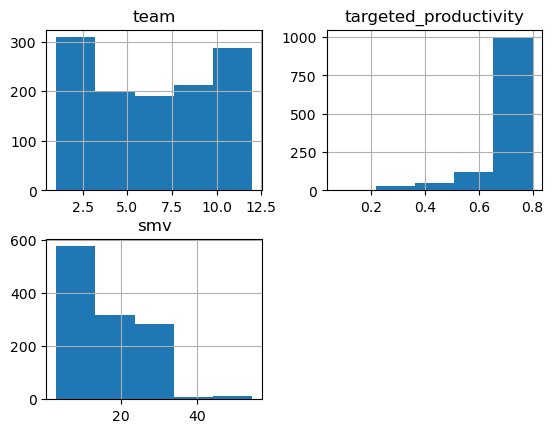

In [20]:
plt.figure(figsize=[20,20])
numerical_data[['team', 'targeted_productivity', 'smv']].hist(bins=5); 

- Obviously , smv, team and target productivity are not well distributed as they are not normalized
- The team variable seems bimodal, while, target productivity is left skewed, and smv is right skewed. 
- standard allocated times in munutes(smv) 0 and 30 have the highest occurence while the almost no occuenrence for smv between 35 upward. Hence, it is possible that workers were not given up to an hour(60 minutes) and those who were given more than half an hour are very small(almost insignificant), this could be a possible reason why those workers were not productive and why the former might be but sunsequently in this project, it will be obvious
-  For the **Target productivity**, about 1000 employees in the garment industry were given a target productivity between 0.6 and 0.8 while less than 250 employees were given a target productivity between 0.2 and 0.6, hence, it will be important to know why some workers had higher target productivity than the others, could it be based on the department they find themselves, could it be based on unbiased pattern of of allocating time? 

In [21]:
numerical_data[['incentive','over_time','idle_time','idle_men']].describe()

,incentive,over_time,idle_time,idle_men
count,1197.000000,1197.000000,1197.000000,1197.000000
mean,38.210526,4567.460317,0.730159,0.369256
std,160.182643,3348.823563,12.709757,3.268987
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1440.000000,0.000000,0.000000
50%,0.000000,3960.000000,0.000000,0.000000
75%,50.000000,6960.000000,0.000000,0.000000
max,3600.000000,25920.000000,300.000000,45.000000


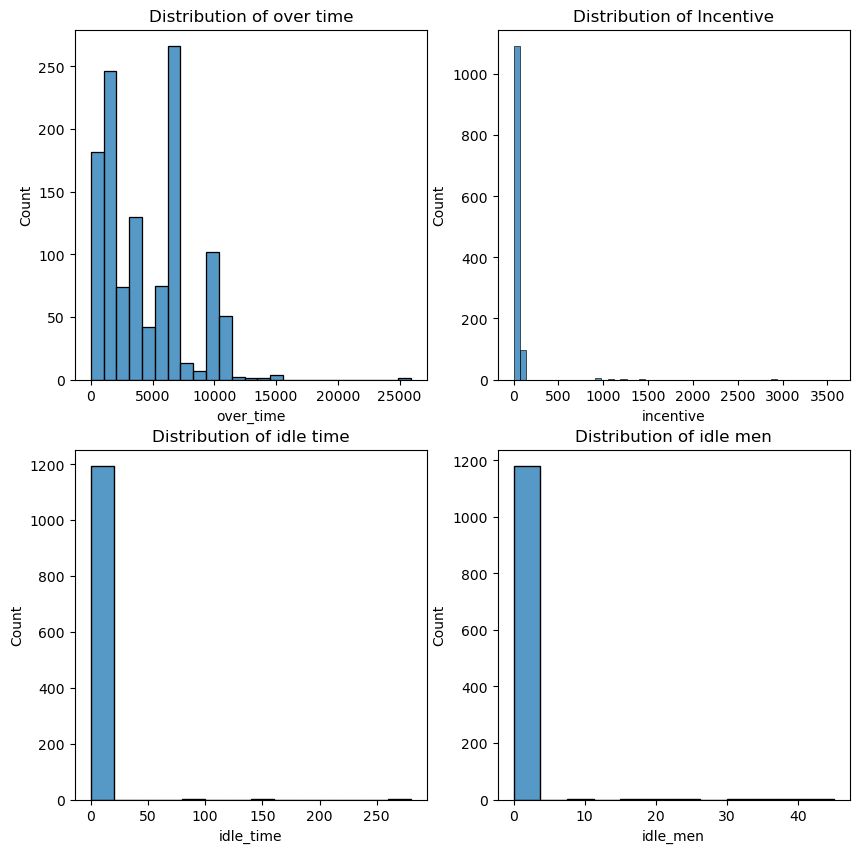

In [22]:
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
sns.histplot(data=numerical_data, x='over_time')
plt.title('Distribution of over time')

plt.subplot(2,2,2)
bins_range= np.arange(0,3600,70)
sns.histplot(data=numerical_data, x='incentive', bins=bins_range)
plt.title('Distribution of Incentive')

plt.subplot(2,2,3)
bins_range=np.arange(0,300, 20)
sns.histplot(data=numerical_data, x='idle_time', bins=bins_range)
plt.title('Distribution of idle time')
          
plt.subplot(2,2,4)
sns.histplot(data=numerical_data, x='idle_men')
plt.title('Distribution of idle men');

- For the **Incentive**, None of the employees had up to 200(dependent on the currency), it will be interesting to explore furhet to see if employees with more over time had more incentives, but more than 1000 employees had incentives while lesser than 200 employees had a little higher incentive than the former
- For the **Over time**, more than 150 employees had a total overtime between 0 and 100(minutes), about 250 employees had a total over time between 100 and 200, not up to 80 but more than 50 employees had over time between 200 and 300, more than 100 but not up to 150 workers had over time between 300 and 400 while less than 50 workers had over time between 400 and 500. between 600 to 700 overtime , there is the highest number of workers with strictly above 250 in numbers.The highest number of overtime which is typically an outlier is between 25000 minutes with extremely small number of workers

<Figure size 2000x2000 with 0 Axes>

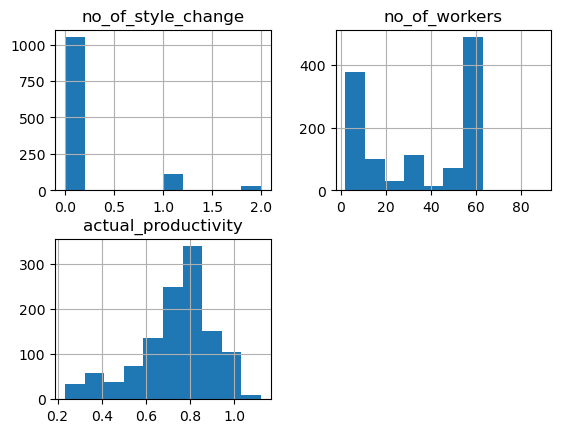

In [23]:
plt.figure(figsize=[20,20])
numerical_data[['no_of_style_change', 'no_of_workers',
       'actual_productivity']].hist(); 

#### Question 2 (What is the distrbution of days, quarter and departments ?)

In [24]:
categorical_data= df.select_dtypes(include=['object'])
categorical_data.columns 

Index(['quarter', 'department', 'day'], dtype='object')

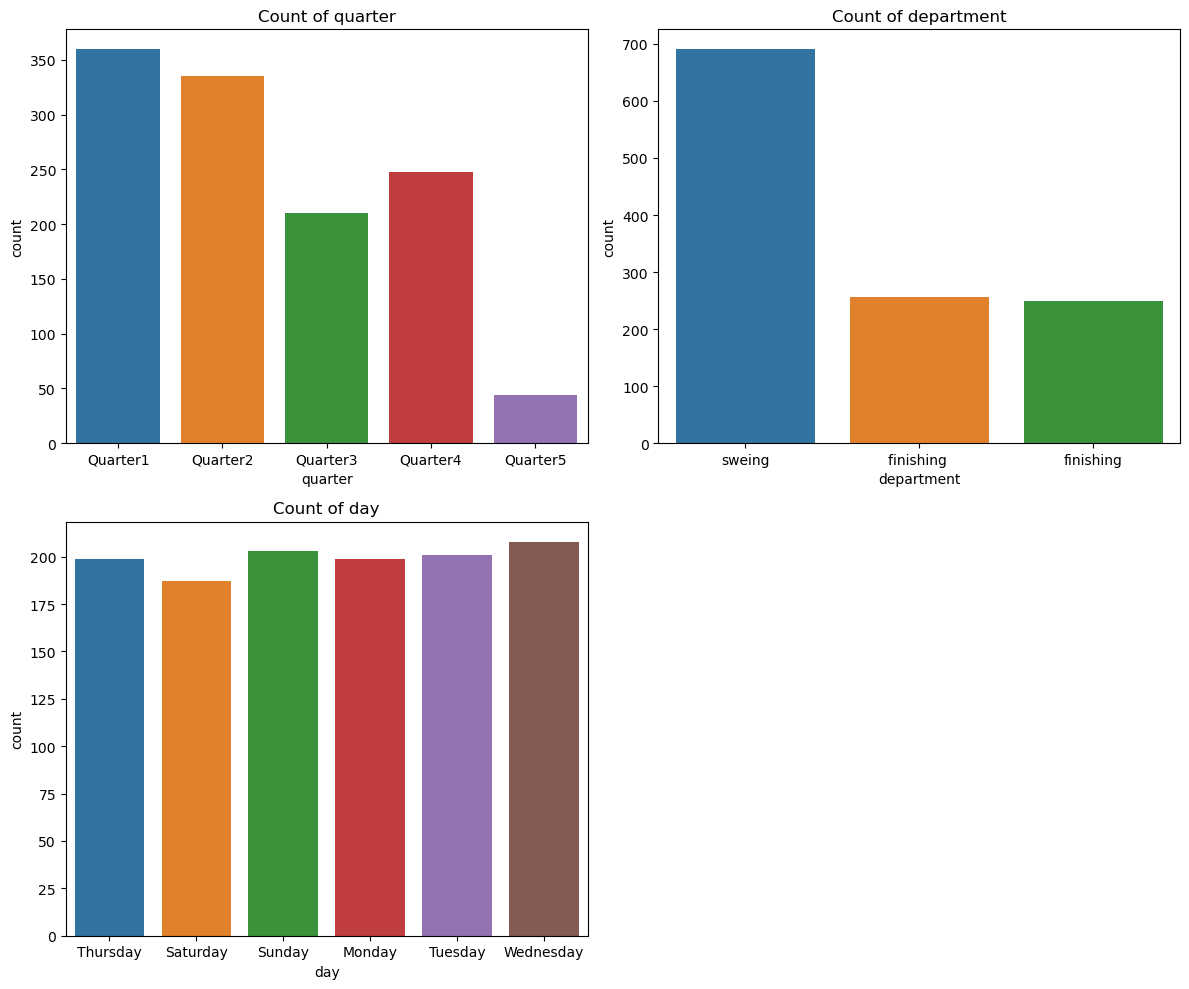

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot count of quarter
sns.countplot(data=df, x='quarter', ax=ax[0, 0])
ax[0, 0].set_title('Count of quarter')

# Plot count of department
sns.countplot(data=df, x='department', ax=ax[0, 1])
ax[0, 1].set_title('Count of department')

# Plot count of day
sns.countplot(data=df, x='day', ax=ax[1, 0])
ax[1, 0].set_title('Count of day')

# Remove the empty subplot
fig.delaxes(ax[1, 1])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

- For the **Quarter** it is reasonable why we had the least number of occuring quarter to be quarter 5, knowing fully well that most months in a year have just 4 quarter.
- Sewing department obvious had the highest number of workers with over 650 of them, while finishing department had lesser than 300 employees
- The population of employees in a particular departement could also add to level of productivity performance but what if there are more professionals in the finishing department than the sewing department? 
- Also from the **day** column , it is  obvious that employees work from monday to sunday with exception of friday. 

### Bivariate and multivariate Analysis

#### Question 3(Which department had the highest average target and actual productivity?)

In [26]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity'],
      dtype='object')

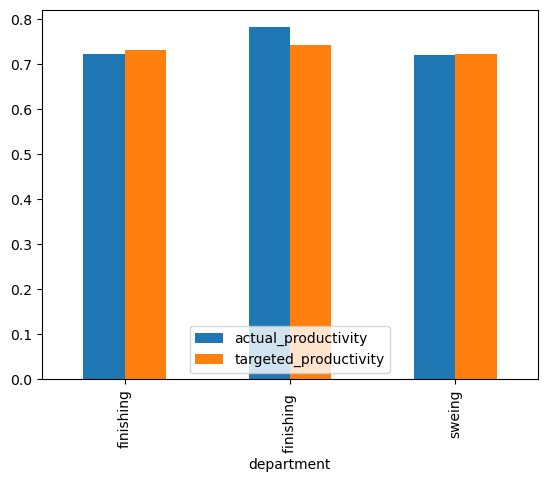

In [27]:
df.groupby('department')[['actual_productivity','targeted_productivity']].mean().plot(kind='bar');

- The finishing department seems to have the highest actual productivity and target productivity than the sewing department.
- from the previous analysis, the sewing department actually had higher number of workers than the finishing department, hence, it is worth further exploring to see why the finishing department with a lower population of workers still had the highest target and actual productivity.

#### Question 4(What is the effect of incentives, team, standard allocated time, idle time, idle men, number of styles change, number of workers and and over time on employees actual productivity ?)

In [28]:
numerical_data.columns

Index(['team', 'targeted_productivity', 'smv', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')

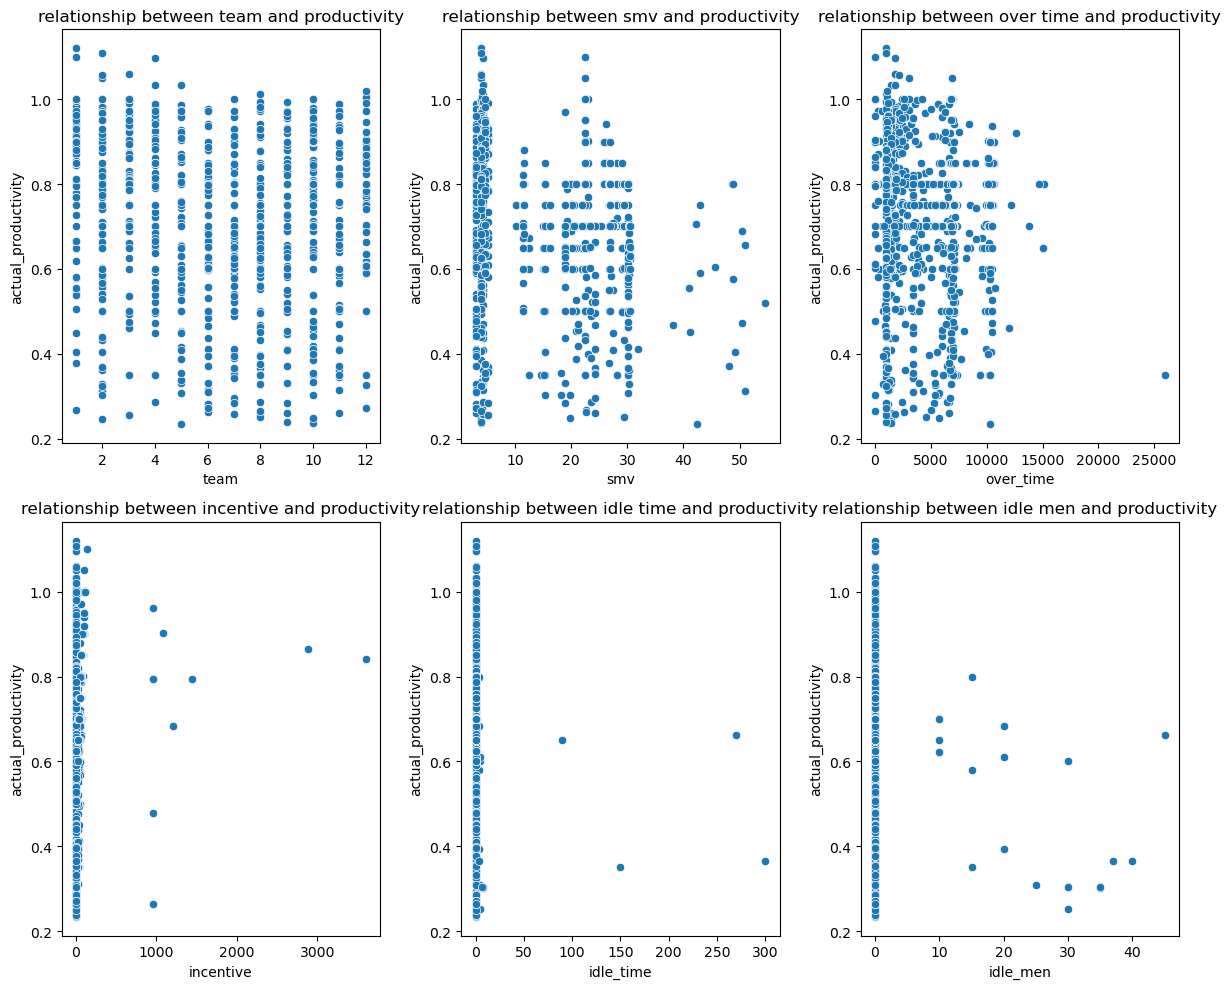

In [29]:
fig, ax = plt.subplots(2, 3, figsize=(12, 10))


sns.scatterplot(data=df, x='team', y='actual_productivity', ax=ax[0, 0])
ax[0, 0].set_title('relationship between team and productivity')


sns.scatterplot(data=df, x='smv', y='actual_productivity', ax=ax[0, 1])
ax[0,1].set_title('relationship between smv and productivity')


sns.scatterplot(data=df, x='over_time', y='actual_productivity', ax=ax[0, 2])
ax[0, 2].set_title('relationship between over time and productivity')


sns.scatterplot(data=df, x='incentive', y='actual_productivity', ax=ax[1, 0])
ax[1, 0].set_title('relationship between incentive and productivity')

sns.scatterplot(data=df, x='idle_time', y='actual_productivity', ax=ax[1, 1])
ax[1, 1].set_title('relationship between idle time and productivity')

sns.scatterplot(data=df, x='idle_men', y='actual_productivity', ax=ax[1, 2])
ax[1, 2].set_title('relationship between idle men and productivity')


# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [69]:
data['team'].unique()

array([ 8,  1, 11, 12,  6,  7,  2,  3,  9, 10,  5,  4], dtype=int64)

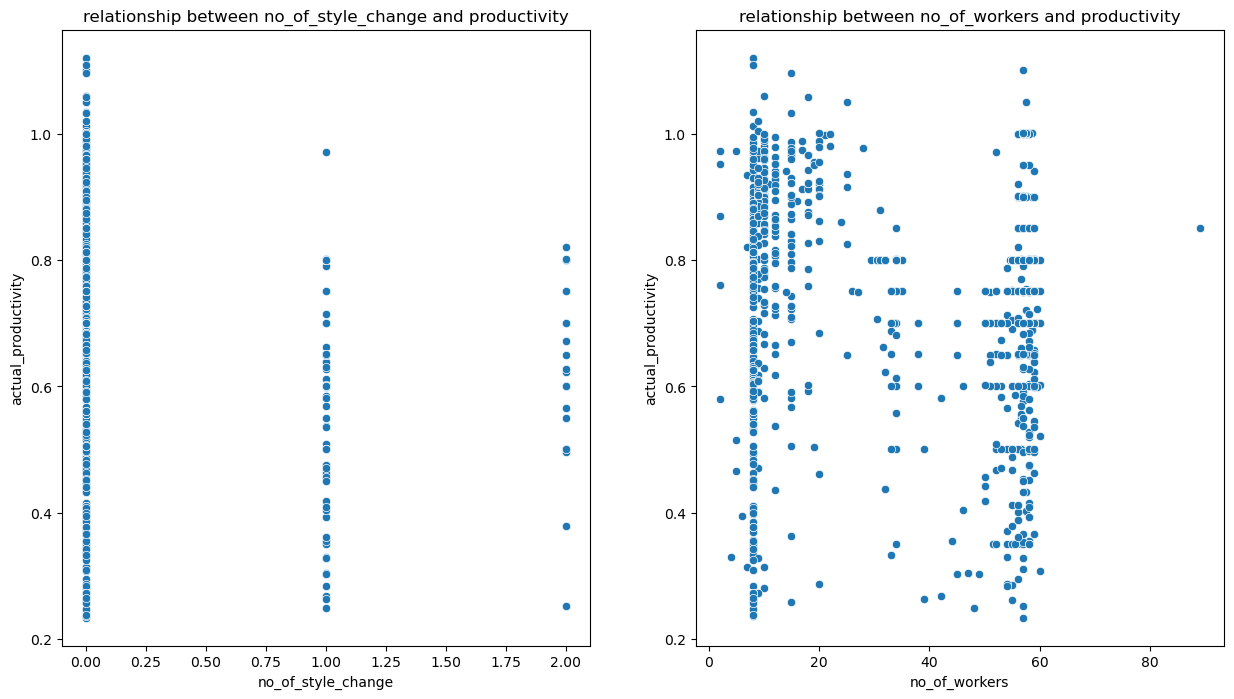

In [30]:
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='no_of_style_change', y='actual_productivity')
plt.title('relationship between no_of_style_change and productivity')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='no_of_workers', y='actual_productivity')
plt.title('relationship between no_of_workers and productivity')

plt.show()

- There is no linear relationship between any of the variables above and the actual productivity.
- There are some data points in variables like number of styles change, number of workers, incentive and idle time that are outliers. Only about two workers were given more than 2500 incentives and these out of many other workers seems like outliers. Most of the workers had incentives concentrated at 0, hence it is like the amount given to workers is not really encouraging.

#### Question 4(What department had the highest average incentive?)

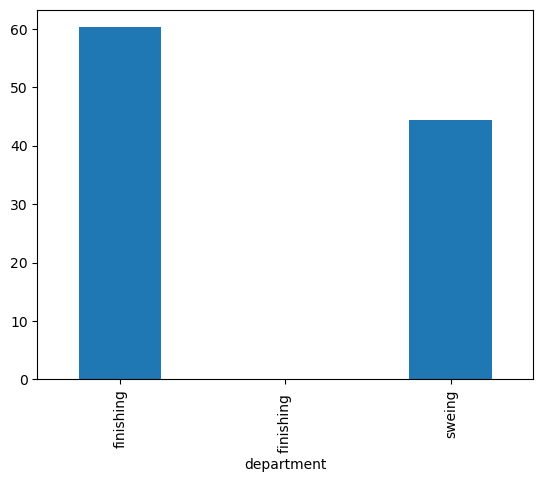

In [31]:
df.groupby('department')['incentive'].mean().plot(kind='bar');

#### Question 5 (Which department and quarter of the month had the highest average standard alloted time? )

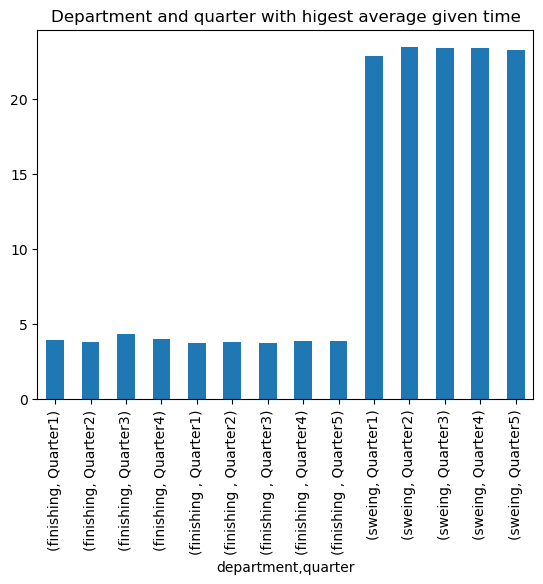

In [32]:
df.groupby(['department','quarter'])['smv'].mean().plot(kind='bar')
plt.title('Department and quarter with higest average given time');

#### Question 6 (Which department and quarter of the month had the highest average amount of  time when the production process was interupted? )

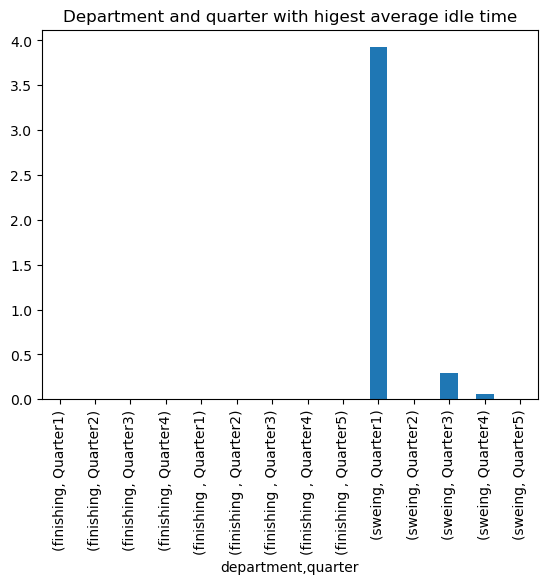

In [33]:
df.groupby(['department','quarter'])['idle_time'].mean().plot(kind='bar')
plt.title('Department and quarter with higest average idle time');

<a id='fe'></a>
## Feature engineering

In [34]:
#print all the features
df.columns 

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity'],
      dtype='object')

In [35]:
df['remainder_productivity']=df['targeted_productivity']-df['actual_productivity']
df['time_left_after_interuption']=df['smv']-df['idle_time'] 

In [36]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,remainder_productivity,time_left_after_interuption
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,-0.140725,26.16
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,-0.136500,3.94
2,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,-0.000570,11.41
3,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,-0.000570,11.41
4,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,-0.000382,25.90


<a id='df'></a>
## Data preprocessing and feature selection

In [37]:
df.shape 

(1197, 15)

In [38]:
dummies= pd.get_dummies(df[['department','quarter','day']], drop_first=True)

In [39]:
dummies.head()

,department_finishing,department_sweing,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,False,True,False,False,False,False,False,False,True,False,False
1,True,False,False,False,False,False,False,False,True,False,False
2,False,True,False,False,False,False,False,False,True,False,False
3,False,True,False,False,False,False,False,False,True,False,False
4,False,True,False,False,False,False,False,False,True,False,False


In [40]:
data= pd.concat([df,dummies],axis=1)
data.columns 

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity', 'remainder_productivity',
       'time_left_after_interuption', 'department_finishing ',
       'department_sweing', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday'],
      dtype='object')

In [41]:
data=data.drop(columns=['quarter','department','day'],axis=1)

In [42]:
data.dtypes

team                             int64
targeted_productivity          float64
smv                            float64
over_time                        int64
incentive                        int64
idle_time                      float64
idle_men                         int64
no_of_style_change               int64
no_of_workers                  float64
actual_productivity            float64
remainder_productivity         float64
time_left_after_interuption    float64
department_finishing              bool
department_sweing                 bool
quarter_Quarter2                  bool
quarter_Quarter3                  bool
quarter_Quarter4                  bool
quarter_Quarter5                  bool
day_Saturday                      bool
day_Sunday                        bool
day_Thursday                      bool
day_Tuesday                       bool
day_Wednesday                     bool
dtype: object

In [43]:
data['department_finishing ']=data['department_finishing '].replace({True:1, False:0})
data['department_sweing']=data['department_sweing'].replace({True:1, False:0})
data['quarter_Quarter2']=data['quarter_Quarter2'].replace({True:1, False:0})
data['quarter_Quarter3']=data['quarter_Quarter3'].replace({True:1, False:0})
data['quarter_Quarter4']=data['quarter_Quarter4'].replace({True:1, False:0})
data['quarter_Quarter5']=data['quarter_Quarter5'].replace({True:1, False:0})
data['day_Saturday']=data['day_Saturday'].replace({True:1, False:0})
data['day_Sunday']=data['day_Sunday'].replace({True:1, False:0})
data['day_Thursday']=data['day_Thursday'].replace({True:1, False:0})
data['day_Tuesday']=data['day_Tuesday'].replace({True:1, False:0})
data['day_Wednesday']=data['day_Wednesday'].replace({True:1, False:0})

In [44]:
#q1= data.quantile(.25, axis=0)
#q3= data.quantile(.75, axis=0)
#iqr=q3-q1
#outliers= data[((data < (q1-1.5*iqr)) | (data > (q3 + 1.5*iqr))).any(axis=1)]

<AxesSubplot:>

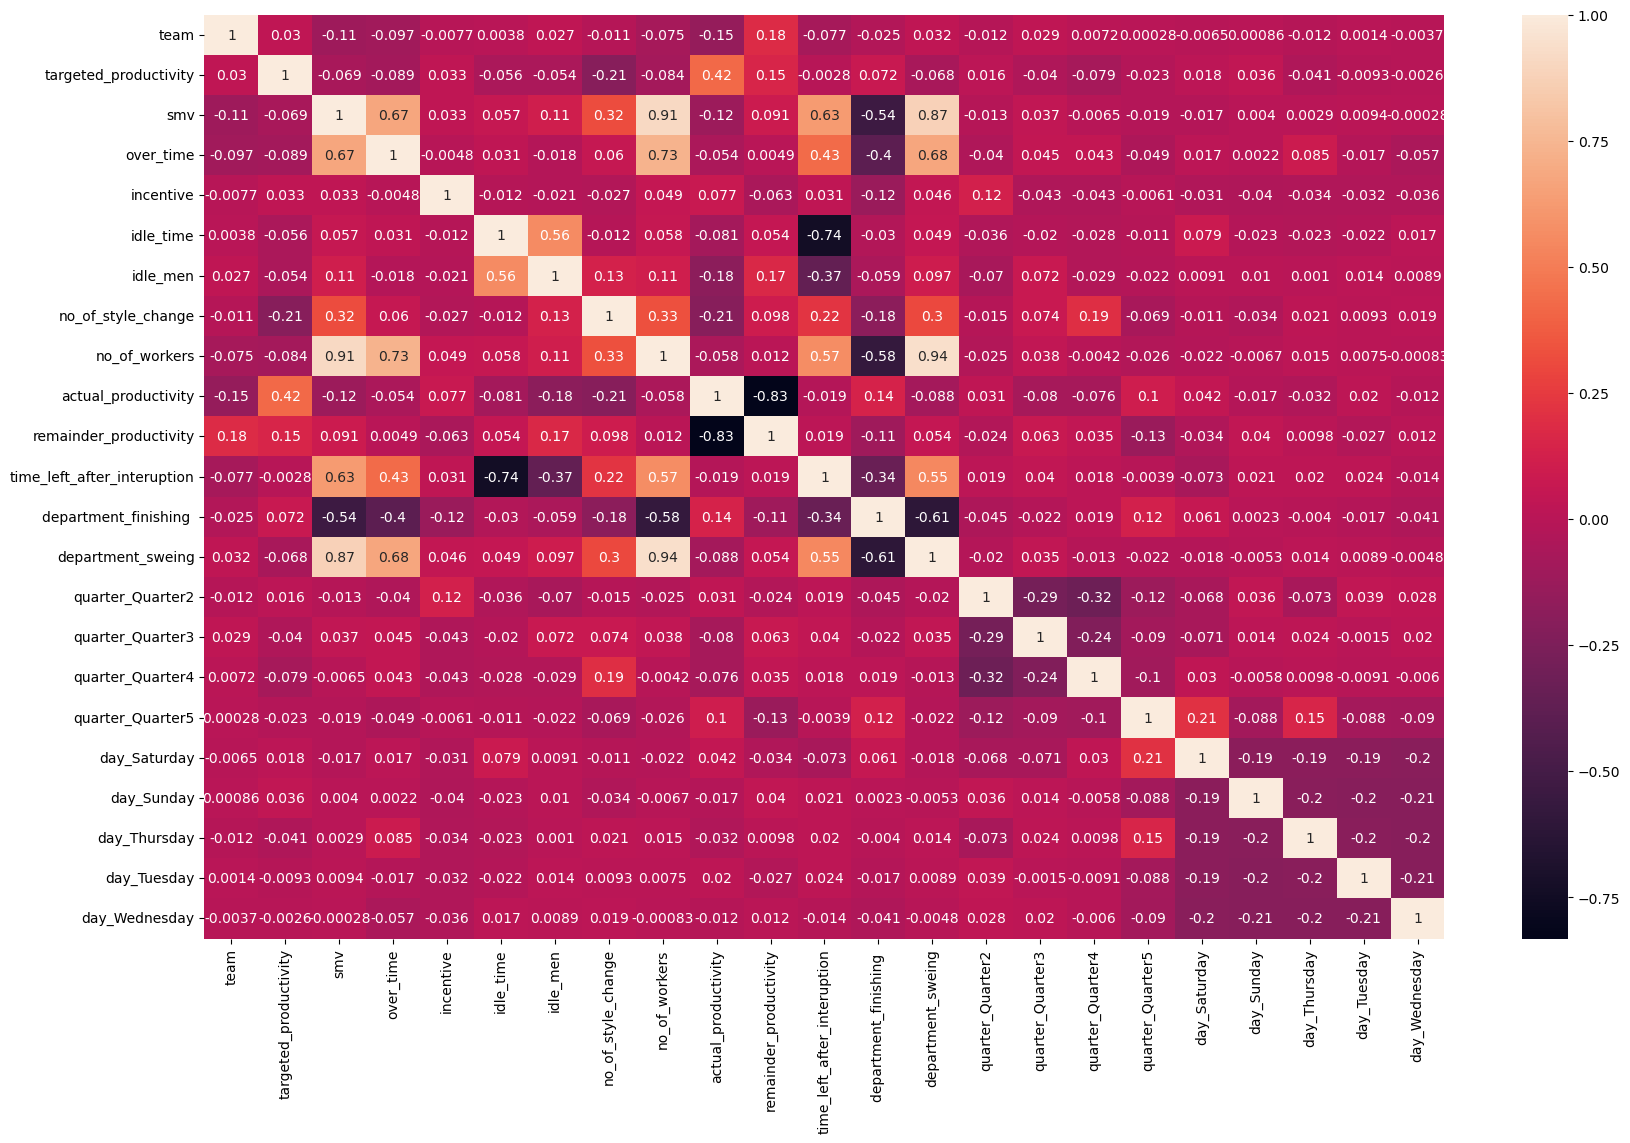

In [45]:
plt.figure(figsize=[20,12])
sns.heatmap(data.corr(), annot=True)

**Columns with multicollinearity**
- department_sweing and smv (with correlation coefficient of 0.87)
- number of workers and smv (with correlation coefficient of 0.91)
- numbers of workers and department sweing (with correlation coefficient of 0.94)

##### Feature Selection using variance inflection factor and principal component analysis

In [46]:
x= data.drop(columns=['actual_productivity'],axis=1)
y=data['actual_productivity']

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#X= data.drop(columns=['Network'],axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Compute the covariance matrix
cov_matrix = np.cov(X_scaled.T)

# Compute the principal components
pca = PCA()
pca.fit(X_scaled)

# Determine the number of components to keep
explained_variance = pca.explained_variance_ratio_
n_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1

# Fit PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Get the names of the columns
component_names = ['PC{}'.format(i+1) for i in range(pca.n_components_)]
feature_names = list(x.columns)
component_names_and_features = list(zip(component_names, feature_names))

In [48]:
component_names_and_features 

[('PC1', 'team'),
 ('PC2', 'targeted_productivity'),
 ('PC3', 'smv'),
 ('PC4', 'over_time'),
 ('PC5', 'incentive'),
 ('PC6', 'idle_time'),
 ('PC7', 'idle_men'),
 ('PC8', 'no_of_style_change'),
 ('PC9', 'no_of_workers'),
 ('PC10', 'remainder_productivity'),
 ('PC11', 'time_left_after_interuption'),
 ('PC12', 'department_finishing '),
 ('PC13', 'department_sweing'),
 ('PC14', 'quarter_Quarter2'),
 ('PC15', 'quarter_Quarter3'),
 ('PC16', 'quarter_Quarter4')]

In [49]:
# Utility function to return the VIF value for each feature provided
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(features, data):
    """
    Returns a DataFrame containing features and their corresponding variance inflation factor
    features: list of features whoes multicollinearity check is needed
    df: DataFrame of the data under review
    """
    X = data[features]   
    X['intercept'] = 1
    # Create dataframe to store vif values
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['Vif Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Feature']!='intercept'].sort_values('Vif Factor', ascending=False)
    return vif

In [50]:
def select_features(train_df, threshold):
    """
    Returns two objects;
    1. a DataFrame containing features and their corresponding variance inflation factor, and
    2. Pandas Index object containing the list of features that have the least Multicollinearity in accordance with
       the supplied threshold.
    train_df: The training dataset whoes Multicollinearity is to be checked
    threshold: value to compare VIF value with, above which, the feature droped
    """
    data = train_df.copy()
    flag = True
    while flag:
        features_to_consider = data.columns
        # Calling the "compute_vif" utility function the Variance Inflation Factor dataframe
        sorted_vif_df = (compute_vif(features_to_consider, data).reset_index().drop('index', axis=1))

        # Get the highest vif value to compare against a threshold
        highest_vif = sorted_vif_df.at[0, 'Vif Factor']
        
        # Compare the highest_vif with a threshold (5 was decided for this problem by the team)
        if highest_vif > threshold: # or highest_vif=='inf':
            # Select the feature corresponding to the highest_vif (index 0 for both)
            feature = sorted_vif_df.at[0, 'Feature'] 
            # Drop the feature
            data.drop(feature, axis=1, inplace=True) 
            
        else:
            flag = False
    return sorted_vif_df, data.columns

In [51]:
threshold=5
vif, features = select_features(data, threshold)

In [52]:
data_vif= data[features]

In [53]:
data_vif.head()
#data_vif.shape 

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,remainder_productivity,department_finishing,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.80,26.16,7080,98,0.0,0,0,-0.140725,0,0,0,0,0,0,0,1,0,0
1,1,0.75,3.94,960,0,0.0,0,0,-0.136500,1,0,0,0,0,0,0,1,0,0
2,11,0.80,11.41,3660,50,0.0,0,0,-0.000570,0,0,0,0,0,0,0,1,0,0
3,12,0.80,11.41,3660,50,0.0,0,0,-0.000570,0,0,0,0,0,0,0,1,0,0
4,6,0.80,25.90,1920,50,0.0,0,0,-0.000382,0,0,0,0,0,0,0,1,0,0


In [54]:
data_pca=  data[feature_names]

In [55]:
data_pca .head()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,remainder_productivity,...,department_sweing,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.80,26.16,7080,98,0.0,0,0,59.0,-0.140725,...,1,0,0,0,0,0,0,1,0,0
1,1,0.75,3.94,960,0,0.0,0,0,8.0,-0.136500,...,0,0,0,0,0,0,0,1,0,0
2,11,0.80,11.41,3660,50,0.0,0,0,30.5,-0.000570,...,1,0,0,0,0,0,0,1,0,0
3,12,0.80,11.41,3660,50,0.0,0,0,30.5,-0.000570,...,1,0,0,0,0,0,0,1,0,0
4,6,0.80,25.90,1920,50,0.0,0,0,56.0,-0.000382,...,1,0,0,0,0,0,0,1,0,0


In [56]:
x= data_vif.drop(columns=['smv','targeted_productivity'],axis=1)
y= data['actual_productivity']

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)
scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)

<a id='ms'></a>
## Model selection, development and evaluation

In [58]:
def evaluate_model( model,x,y):
    """
    Utility function to evaluate models 
    x : features
    y: target
    returns: model returns rmse
    """
    
    predicted= model.predict(x)
    accuracy= model.score(x,y)
    rmse= np.sqrt(mean_squared_error(y_true=y, y_pred=predicted))
    
    print('='*10)
    print('Rmse on test set is {}\n'.format(rmse))
    print('accuracy on test set is {}\n'.format(accuracy))
    print()

In [59]:

models = {'Xgboost': XGBRegressor(), 
         'Gradientbosst': GradientBoostingRegressor(),
         'Random forest': RandomForestRegressor(),
         'Adaboost': AdaBoostRegressor() }

for keys, model in models.items():
    model.fit(x_train, y_train)
    
    
    print('The performance of {} on test set is :'.format(keys))
    print('='*10)
    print('*'*10)
    evaluate_model(model, x_test, y_test)

The performance of Xgboost on test set is :
**********
Rmse on test set is 0.06412541375604977

accuracy on test set is 0.860918306215236


The performance of Gradientbosst on test set is :
**********
Rmse on test set is 0.06761656192311995

accuracy on test set is 0.8453621583179323


The performance of Random forest on test set is :
**********
Rmse on test set is 0.06483311907214581

accuracy on test set is 0.8578314801997299


The performance of Adaboost on test set is :
**********
Rmse on test set is 0.08954197455607009

accuracy on test set is 0.728816697957295




In [60]:
rmse_average= []
regressors= ['Xgboost','Gradientboost','Random forest',' Adaboost']
models= [XGBRegressor(), GradientBoostingRegressor(), RandomForestRegressor(), AdaBoostRegressor()]
from tqdm import tqdm
for model in tqdm(models):
    cv= cross_val_score(model, x_train, y_train, cv=5)
    mse= cv.mean()
    rmse= np.abs(np.sqrt(mse))
    rmse_average.append(rmse)
rmse_dataframe= pd.DataFrame({ 'average rmse': rmse_average} ,index=regressors)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.30s/it]


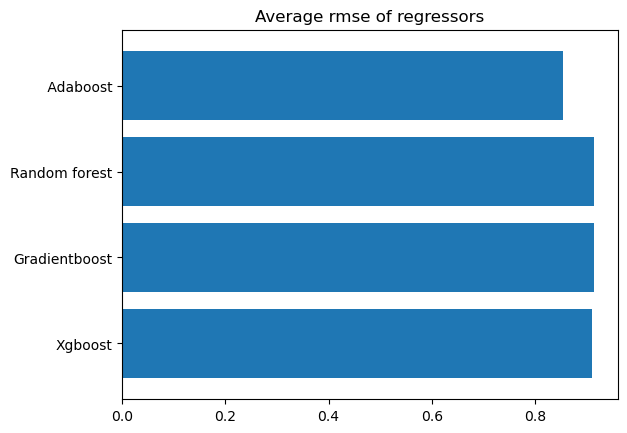

In [61]:
rmse_dataframe['average rmse'].plot.barh(width=0.8)
plt.title('Average rmse of regressors');

<a id='hp'></a>
## Hyperparameter optimization

In [62]:
hyper= { 'n_estimators': [500, 100, 150],
        'max_depth': [5,10,15],
        'learning_rate':[0.1,0.3,0.5]}

gcv_model= GridSearchCV(XGBRegressor(), param_grid=hyper)
gcv_model.fit(x_train, y_train)
print(gcv_model.best_estimator_)
print(gcv_model.best_score_)
print(gcv_model.best_params_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
0.8406011099411238
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}


In [63]:
new_model= XGBRegressor(learning_rate= 0.1, max_depth=5, n_estimators=150)
new_model.fit(x_train, y_train)
predicted= new_model.predict(x_test)
test_score= new_model.score(x_test, y_test)
rmse= np.sqrt(mean_squared_error(y_test, predicted)) 

In [64]:
print(test_score, rmse)

0.8703436010384472 0.06191447184094415


In [65]:
residuals= y_test-predicted

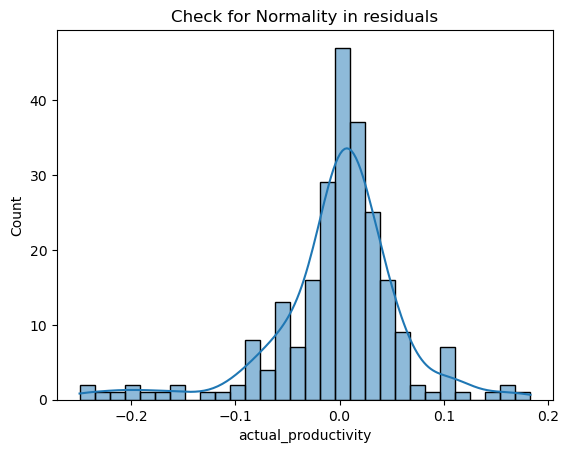

In [66]:
sns.histplot(residuals, kde=True)
plt.title('Check for Normality in residuals');

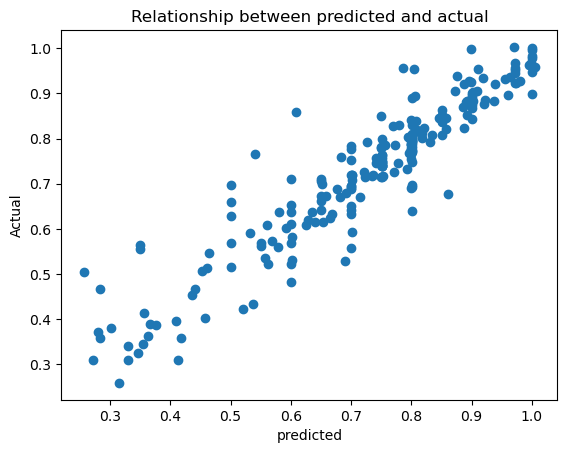

In [67]:
plt.scatter( y_test, predicted)
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Relationship between predicted and actual');

## Conclusion
- From the analysis, it is obvious that the finishing department achieved better productivity than the sewing department despite the larger population of workers in the sewing department. Also the incentive given to more than 70% of the workers in the industry is not up to 2500.  Workers who were given standard time between 0 amd 30 achieved more productivity than all the workers that was given more time on tasks. The productivity of the workers lies more with a higher probability on their incentive, idle time, and the amount of time that was left after they were interupted while working

## Recommendations
- It is advisable that the company(Grament industry) sees to increasing the incentive of the workers intentionally without being biased so as to see if there will be possible increaments in the productivity of workers in the garment industry.
- Also, the reason why there are more workers in the sewing department than the finishing department and yet the finishing department had higher actual productivity could mean that there are some incompetent workers in the sewing department and it will be nice for the industry to do some shuffling this time around by randomly distributing workers and seeing what impact will be achieved or the firm can select out those workers who actually had a very small error margin between actual and target productivity and place them in less performing teams to see the posibility of them influencing other non productive workers.
- Also, 75% of the garment industry workers had below 6960 over time, and this can have a very great but negative effect on the workers because they will not rest during the weekend hence they will be exposed to stress and as a result leading to mental stress which will definately not make them productive, so workers salary should be increased to be able to see if money is actually why they are over working and then no worker should work for more than 5 days in a week.

## Limitations
- This analysis would have been almost perfect if the data has more details about the stress level of workers, income(salary) of workers, distance between residence to the company, position of the workers and the sentiment of workers. Also it was stated that for some reasons the time some work was interupted, these reasons should be stated and made available in data format for proper analysis. 